# Detecting outliers(Univariate outliers)

visualization, Detecting

1. Tukey’s box plot method

2. Internally studentized residuals (AKA z-score method)

3. Median Absolute Deviation method

In [1]:
import pandas.util.testing as tm
#Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#Extra libraries
from scipy.stats.mstats import winsorize
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import make_pipeline
import random



/var/folders/mz/2khdgr0n36g4p2xmp3w9z0qm0000gp/T/ipykernel_30759/982962823.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
X = pd.read_csv("../screenTime/newdata2.csv")

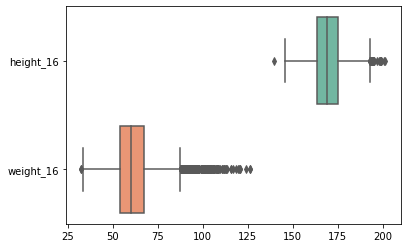

In [3]:
X_cont = X[['height_16','weight_16']]
ax= sns.boxplot(data=X[['height_16','weight_16']], orient="h", palette="Set2")

In [4]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        
probable_outliers_tm, possible_outliers_tm = tukeys_method(X_cont, 'height_16')
print(probable_outliers_tm)
print(possible_outliers_tm)
print(X_cont['weight_16'][possible_outliers_tm])

[]
[118, 514, 958, 1062, 1085, 1190, 1320, 1938, 1962, 2366, 3710, 3924, 4044, 4889, 5072, 5323, 5455, 5974, 6265, 6497, 9054, 9254, 10612, 11798, 11866, 12092, 12477, 12888, 12892]
118       68.669154
514       42.848642
958       82.901765
1062      76.796158
1085      83.071403
1190      70.802146
1320      71.104713
1938      62.000961
1962      68.464041
2366      62.437530
3710      77.070405
3924      76.646987
4044      75.838396
4889      76.357903
5072      62.359532
5323      79.924114
5455      77.114175
5974      62.439289
6265     101.471240
6497      76.777600
9054      67.954919
9254      71.681950
10612     77.094857
11798     69.058515
11866     83.208927
12092     73.948092
12477     83.191177
12888     95.186554
12892     68.975737
Name: weight_16, dtype: float64


In [5]:
#Z-score
def z_score_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    df = np.array(df)
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_z = z_score_method(X_cont, 'height_16')
print(outlier_z)

[]


In [6]:
# MAD method
def mad_method(df, variable_name):
    # remove nan value
    df1 = df.dropna()
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df1, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df1))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_mad = mad_method(X_cont, 'height_16')
print(outlier_mad)
print(X_cont['height_16'][outlier_mad])

[118, 958, 1085, 1962, 4889, 5323, 9054, 11798, 11866, 12477, 12892]
118      201.519622
958      196.824923
1085     198.960699
1962     199.154052
4889     195.268917
5323     198.274036
9054     200.724021
11798    199.031119
11866    199.057470
12477    198.306041
12892    198.468543
Name: height_16, dtype: float64


/var/folders/mz/2khdgr0n36g4p2xmp3w9z0qm0000gp/T/ipykernel_30759/2559111113.py:8: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  mad = np.abs(stats.median_absolute_deviation(df1))


# Handling non-error outliers
There exist three different options on how to treat non-error outliers:

1. Keep

2. Delete/trimming

3. Recode/capping


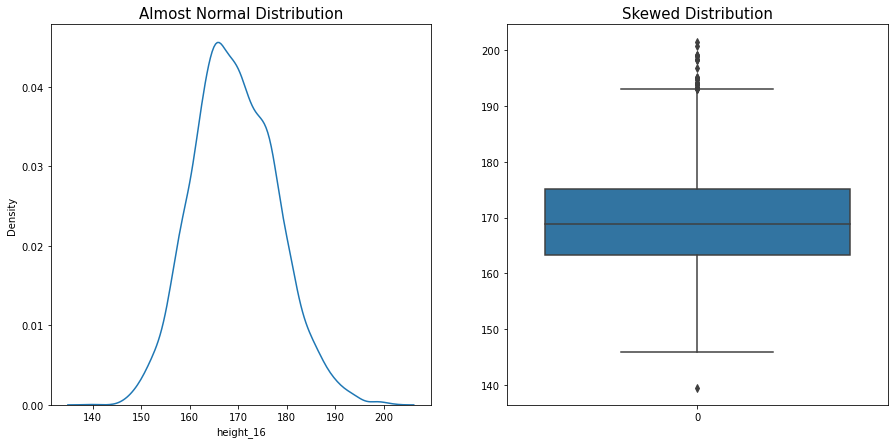

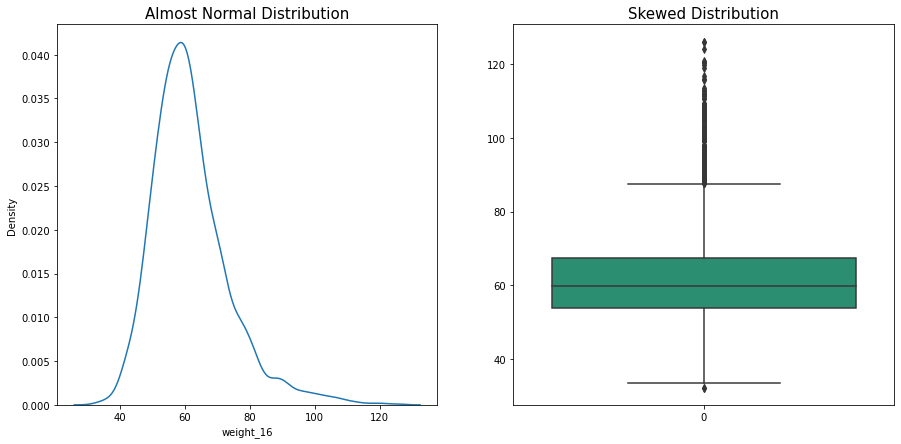

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Almost Normal Distribution", fontsize=15)
sns.kdeplot(data = X_cont['height_16'])

plt.subplot(1,2,2)
plt.title("Skewed Distribution", fontsize=15)
sns.boxplot(data = X_cont['height_16'])

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Almost Normal Distribution", fontsize=15)
sns.kdeplot(data = X_cont['weight_16'])

plt.subplot(1,2,2)
plt.title("Skewed Distribution", fontsize=15)
sns.boxplot(data = X_cont['weight_16'], palette="Dark2")
plt.show()

# Remove (Standard Deviation)

if data is almost normal, we can use standard deviation method,

if data is skewed, we can use IQR method.`


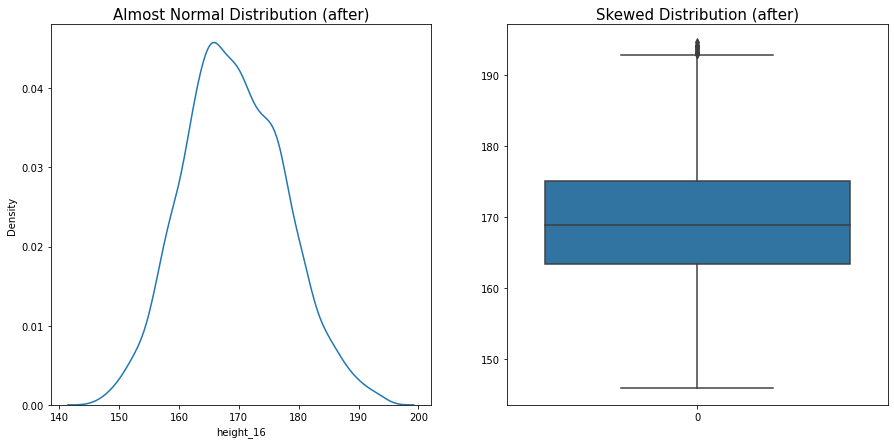

In [8]:
#trimming the outliers away and we only have the distribution in 3 standard deviation

#defining lower and upper limit
norm_upper_limit = X_cont['height_16'].mean() + 3 * X_cont['height_16'].std()
norm_lower_limit = X_cont['height_16'].mean() - 3 * X_cont['height_16'].std()

#trimming the outliers away and we only have the distribution in 3 standard deviation
X_cont_new = X_cont[(X_cont['height_16'] > norm_lower_limit) & (X_cont['height_16'] < norm_upper_limit)]

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Almost Normal Distribution (after)", fontsize=15)
sns.kdeplot(data = X_cont_new['height_16'])

plt.subplot(1,2,2)
plt.title("Skewed Distribution (after)", fontsize=15)
sns.boxplot(data = X_cont_new['height_16'])
plt.show()

In [9]:
removed = X_cont[(X_cont['height_16'] > norm_lower_limit) | (X_cont['height_16'] < norm_upper_limit)]
removed

,height_16,weight_16
0,181.602831,59.294132
3,160.224186,49.812426
4,191.703227,62.270030
5,169.722373,78.936613
7,186.327284,84.299663
...,...,...
13721,173.010635,57.230799
13722,168.874408,50.059299
13726,174.365170,59.287609
13731,169.235565,58.075832


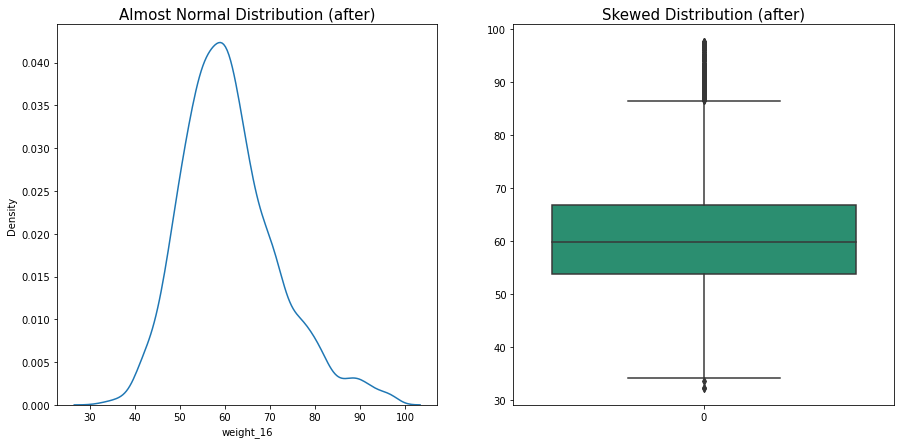

In [10]:
#defining lower and upper limit
norm_upper_limit = X_cont['weight_16'].mean() + 3 * X_cont['weight_16'].std()
norm_lower_limit = X_cont['weight_16'].mean() - 3 * X_cont['weight_16'].std()

#trimming the outliers away and we only have the distribution in 3 standard deviation
X_cont_new = X_cont[(X_cont['weight_16'] > norm_lower_limit) & (X_cont['weight_16'] < norm_upper_limit)]

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Almost Normal Distribution (after)", fontsize=15)
sns.kdeplot(data = X_cont_new['weight_16'])

plt.subplot(1,2,2)
plt.title("Skewed Distribution (after)", fontsize=15)
sns.boxplot(data = X_cont_new['weight_16'], palette="Dark2")
plt.show()

# Recoding/Capping & Inter-Quartile Range (IQR)

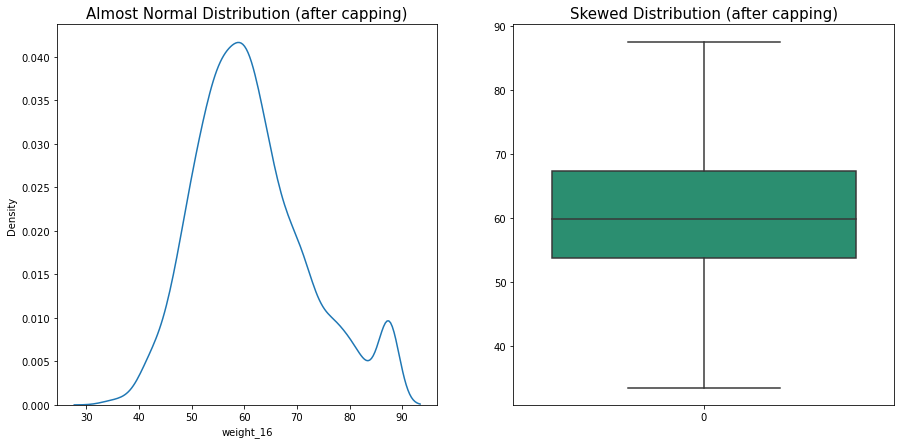

In [11]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = X_cont['weight_16'].quantile(0.25)
q2 = X_cont['weight_16'].quantile(0.75)

#finding out the value of Inter Quartile Range
IQR = q2 - q1

#defining max and min limits
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 

#capping
X_cont_new = pd.DataFrame(np.where(X_cont['weight_16'] > max_limit, max_limit, 
         (np.where(X_cont['weight_16'] < min_limit, min_limit, X_cont['weight_16']))), columns=["weight_16"])

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Almost Normal Distribution (after capping)", fontsize=15)
sns.kdeplot(data = X_cont_new['weight_16'])

plt.subplot(1,2,2)
plt.title("Skewed Distribution (after capping)", fontsize=15)
sns.boxplot(data = X_cont_new['weight_16'], palette="Dark2")
plt.show()

## different methods to recode an outlier

1. Winsorizing
2. Imputation

In [12]:
#Winsorizing

#inner fences of the variable CRIM
def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    return inner_fence_le, inner_fence_ue

inner_fence_le, inner_fence_ue = fences(X_cont, 'height_16')

print('Lower end inner_fence: ', inner_fence_le)
print('Upper end inner_fence: ', inner_fence_ue)

Lower end inner_fence:  145.53619103209192
Upper end inner_fence:  192.95240175954407


In [13]:
#Explore different quantiles at the upper end
print('90% quantile:   ', X_cont['height_16'].quantile(0.90))      
print('92.5% quantile: ', X_cont['height_16'].quantile(0.925))    
print('95% quantile:   ', X_cont['height_16'].quantile(0.95))     
print('97.5% quantile: ', X_cont['height_16'].quantile(0.975))    
print('99% quantile:   ', X_cont['height_16'].quantile(0.99))
print('99.5% quantile: ', X_cont['height_16'].quantile(0.995))
print('99.9% quantile: ', X_cont['height_16'].quantile(0.999))   

90% quantile:    180.37341985662385
92.5% quantile:  181.69636643476167
95% quantile:    183.82347187494923
97.5% quantile:  186.84746399487284
99% quantile:    190.53846330861316
99.5% quantile:  192.97892635811388
99.9% quantile:  198.78204674802532


In [14]:
#Explore different quantiles at the upper end
print('10% quantile:   ', X_cont['height_16'].quantile(0.1))      
print('7.5% quantile: ', X_cont['height_16'].quantile(0.075))    
print('5% quantile:   ', X_cont['height_16'].quantile(0.05))     
print('2.5% quantile: ', X_cont['height_16'].quantile(0.025))    
print('1% quantile:   ', X_cont['height_16'].quantile(0.01))
print('0.1% quantile: ', X_cont['height_16'].quantile(0.001))   

10% quantile:    158.58252305209442
7.5% quantile:  157.45004415904418
5% quantile:    156.07452573470616
2.5% quantile:  153.60431130251595
1% quantile:    151.20955397782254
0.1% quantile:  147.12123963806525


(0.1% quantile) 147.12 > 145.54 (lower inner_fence ), thus there is no need to winsorize lower end outliers.

(99.5% quantile) 192.98 > 192.95240175954407(upper inner_fence), thus we can recode data above 99.5% quantile

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


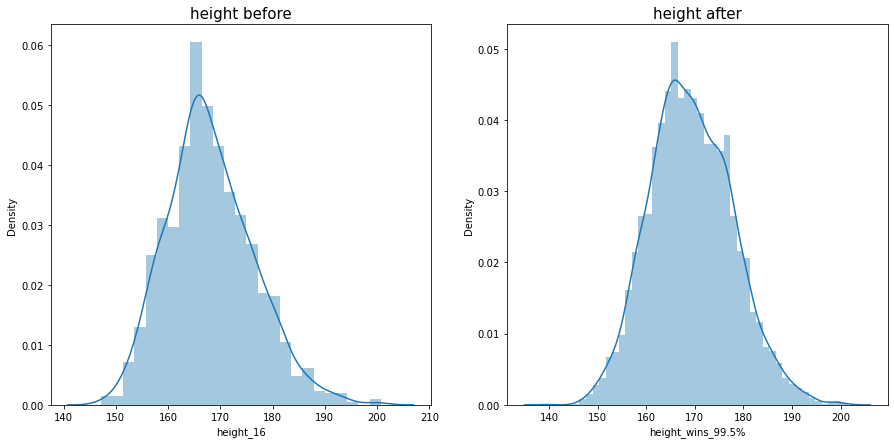

In [15]:
#Create copy of df
X_win = X_cont.copy(deep=True)

#Winsorize on right-tail
X_win['height_wins_99.5%'] = winsorize(X_cont['height_16'], limits=(0, 0.05))


X_win.describe()

#Distribution plot
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("height before", fontsize=15)
X_remove_na = X.dropna()
sns.distplot(X_remove_na['height_16'])

#New distribution plots 
plt.subplot(1,2,2)
plt.title("height after", fontsize=15)
X_win_remove_na = X_win.dropna()
sns.distplot(X_win_remove_na['height_wins_99.5%'])
plt.show()

# Multivariate outlier (Numeral)

In [16]:
import copy 
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

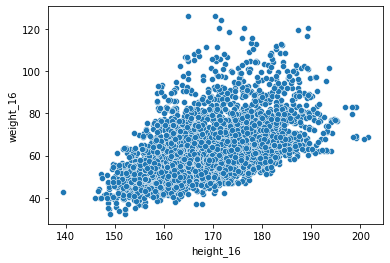

In [17]:
ax = sns.scatterplot(x="height_16", y="weight_16", data=X_cont)

In [18]:

#Mahalonibis Distance

def mahalanobis_method(df):
    df1 = df.dropna()
    #M-Distance
    x_minus_mu = df1 - np.mean(df1)
    cov = np.cov(df1.values.T)                           #Covariance
    inv_covmat = sp.linalg.inv(cov)                     #Inverse covariance
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    #Cut-off point
    C = np.sqrt(chi2.ppf((1-0.001), df=df1.shape[1]))    #degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

outliers_mahal_bi, md_bi = mahalanobis_method(df=X_cont)
outliers_mahal_bi

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


[27,
 40,
 82,
 136,
 325,
 394,
 428,
 713,
 744,
 852,
 1148,
 1167,
 1172,
 1273,
 1321,
 1323,
 1524,
 1580,
 1663,
 1794,
 1985,
 2004,
 2052,
 2144,
 2300,
 2301,
 2454,
 2456,
 2511,
 2549,
 2692,
 2900,
 3425,
 3512,
 3556,
 3624,
 3626,
 3865,
 3962,
 4109,
 4140,
 4351,
 4415,
 4514,
 4549,
 4550,
 4785,
 4869,
 4969,
 4984,
 5114,
 5136,
 5186]

In [19]:
#Robust Mahalonibis Distance
def robust_mahalanobis_method(df):
    df1 = df.dropna()


    #Minimum covariance determinant
    rng = np.random.RandomState(0)
    real_cov = np.cov(df1.values.T)
    X = rng.multivariate_normal(mean=np.mean(df1, axis=0), cov=real_cov, size=506)
    cov = MinCovDet(random_state=0).fit(X)
    mcd = cov.covariance_ #robust covariance metric
    robust_mean = cov.location_  #robust mean
    inv_covmat = sp.linalg.inv(mcd) #inverse covariance metric
    
    #Robust M-Distance
    x_minus_mu = df1 - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())

    
    #Flag as outlier
    outlier = []
    C = np.sqrt(chi2.ppf((1-0.001), df=df1.shape[1]))#degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

outliers_mahal_rob_bi, md_rb_bi = robust_mahalanobis_method(df=X_cont)
outliers_mahal_rob_bi

[27,
 40,
 82,
 136,
 177,
 325,
 394,
 396,
 428,
 460,
 573,
 696,
 713,
 744,
 831,
 852,
 910,
 1148,
 1165,
 1167,
 1172,
 1273,
 1321,
 1323,
 1325,
 1461,
 1524,
 1529,
 1580,
 1636,
 1663,
 1684,
 1725,
 1742,
 1794,
 1985,
 2004,
 2052,
 2144,
 2251,
 2255,
 2300,
 2301,
 2382,
 2432,
 2442,
 2454,
 2456,
 2511,
 2549,
 2595,
 2692,
 2703,
 2729,
 2859,
 2900,
 2944,
 2968,
 3209,
 3237,
 3425,
 3434,
 3512,
 3556,
 3569,
 3624,
 3626,
 3865,
 3923,
 3962,
 4022,
 4109,
 4140,
 4351,
 4403,
 4415,
 4514,
 4549,
 4550,
 4741,
 4785,
 4807,
 4863,
 4869,
 4969,
 4984,
 5006,
 5114,
 5136,
 5140,
 5186,
 5251]

In [20]:
#Visualization
#You need deep copy otherwise cannot 
#add column to a slice of a DataFrame
X_cont_copy = copy.deepcopy(X_cont) 
X_cont_copy = X_cont_copy.dropna()
X_cont = X_cont.dropna()

#Add md and robust md to copy of dataframe
X_cont_copy['md'] = md_bi
X_cont_copy['md_robust'] = md_rb_bi

def flag_outliers(df, outliers):
    flag = []
    for index in range(df.shape[0]):
        if index in outliers:
            flag.append(1)
        else:
            flag.append(0)
    return flag

#Flag outliers with 1, others with 0
X_cont_copy['flag'] = flag_outliers(X_cont, outliers_mahal_bi)
X_cont_copy['flag_rob'] = flag_outliers(X_cont, outliers_mahal_rob_bi)

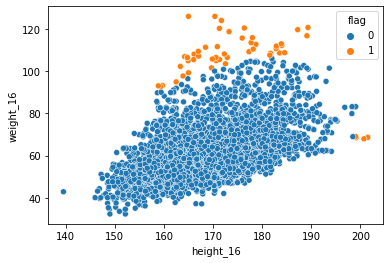

In [21]:
#MD classic
ax = sns.scatterplot(x="height_16", y="weight_16", hue='flag', data=X_cont_copy)

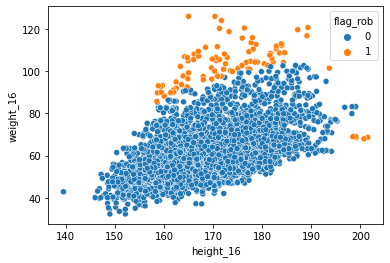

In [22]:
#MD robust
ax = sns.scatterplot(x="height_16", y="weight_16", hue='flag_rob', data=X_cont_copy)